# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet, or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 


Following is to show how to plot to a file to save a graph:

In [1]:
# this is how you save a plot to a file
library(ggplot2)
library(RColorBrewer)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [2]:
# Read your data here; 

# Clean it up, reformat it, filter it, sort it, group it, etc.

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
# <- ALL YOUR CODE HERE ->
file <- read.csv('/home/jpsvf2/jupyter/student-mat.csv', encoding = 'utf-8', sep = ';', stringsAsFactors = FALSE)
head(file)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
library(dplyr)
library(tidyr)
library(lubridate)

colnames(file)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

In [4]:
distinct(file, romantic)

romantic
<chr>
no
yes


In [5]:
distinct(file, studytime)

studytime
<int>
2
3
1
4


In [6]:
distinct(file, school)

school
<chr>
GP
MS


In [7]:
Dalc1_df <- select(file, Dalc, G1, G2, G3) %>% filter(Dalc == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc1_df <- Dalc1_df %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc1_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc1_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc1_df, Average.G3 = mean(G3, na.rm = T)))

Dalc2_df <- select(file, Dalc, G1, G2, G3) %>% filter(Dalc == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc2_df <- Dalc2_df %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc2_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc2_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc2_df, Average.G3 = mean(G3, na.rm = T)))

Dalc3_df <- select(file, Dalc, G1, G2, G3) %>% filter(Dalc == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc3_df <- Dalc3_df %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc3_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc3_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc3_df, Average.G3 = mean(G3, na.rm = T)))

Dalc4_df <- select(file, Dalc, G1, G2, G3) %>% filter(Dalc == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc4_df <- Dalc4_df %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc4_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc4_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc4_df, Average.G3 = mean(G3, na.rm = T)))

Dalc5_df <- select(file, Dalc, G1, G2, G3) %>% filter(Dalc == 5) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc5_df <- Dalc5_df %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc5_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc5_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc5_df, Average.G3 = mean(G3, na.rm = T)))

head(Dalc1_df, 1)
head(Dalc2_df, 1)
head(Dalc3_df, 1)
head(Dalc4_df, 1)
head(Dalc5_df, 1)

Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,6,6,11.1558,10.94928,10.73188


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,7,8,10,10.30667,10.01333,9.253333


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,9,11,12,10.57692,10.53846,10.5


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,10,13,13,9.777778,9.777778,9.888889


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,10,12,11,10.44444,10.77778,10.66667


In [8]:
Walc1_df <- select(file, Walc, G1, G2, G3) %>% filter(Walc == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc1_df <- Walc1_df %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc1_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc1_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc1_df, Average.G3 = mean(G3, na.rm = T)))

Walc2_df <- select(file, Walc, G1, G2, G3) %>% filter(Walc == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc2_df <- Walc2_df %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc2_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc2_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc2_df, Average.G3 = mean(G3, na.rm = T)))

Walc3_df <- select(file, Walc, G1, G2, G3) %>% filter(Walc == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc3_df <- Walc3_df %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc3_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc3_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc3_df, Average.G3 = mean(G3, na.rm = T)))

Walc4_df <- select(file, Walc, G1, G2, G3) %>% filter(Walc == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc4_df <- Walc4_df %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc4_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc4_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc4_df, Average.G3 = mean(G3, na.rm = T)))

Walc5_df <- select(file, Walc, G1, G2, G3) %>% filter(Walc == 5) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc5_df <- Walc5_df %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc5_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc5_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc5_df, Average.G3 = mean(G3, na.rm = T)))

head(Walc1_df, 1)
head(Walc2_df, 1)
head(Walc3_df, 1)
head(Walc4_df, 1)
head(Walc5_df, 1)

Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,6,6,11.17881,11.05298,10.7351


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6,10,10,11.27059,10.61176,10.08235


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,7,8,10,10.9375,10.9125,10.725


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,6,5,5,9.980392,9.764706,9.686275


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,10,12,11,9.964286,10.35714,10.14286


In [9]:
goout1_df <- select(file, goout, G1, G2, G3) %>% filter(goout == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout1_df <- goout1_df %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout1_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout1_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout1_df, Average.G3 = mean(G3, na.rm = T)))

goout2_df <- select(file, goout, G1, G2, G3) %>% filter(goout == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout2_df <- goout2_df %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout2_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout2_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout2_df, Average.G3 = mean(G3, na.rm = T)))

goout3_df <- select(file, goout, G1, G2, G3) %>% filter(goout == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout3_df <- goout3_df %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout3_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout3_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout3_df, Average.G3 = mean(G3, na.rm = T)))

goout4_df <- select(file, goout, G1, G2, G3) %>% filter(goout == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout4_df <- goout4_df %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout4_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout4_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout4_df, Average.G3 = mean(G3, na.rm = T)))

goout5_df <- select(file, goout, G1, G2, G3) %>% filter(goout == 5) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout5_df <- goout5_df %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout5_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout5_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout5_df, Average.G3 = mean(G3, na.rm = T)))

head(goout1_df, 1)
head(goout2_df, 1)
head(goout3_df, 1)
head(goout4_df, 1)
head(goout5_df, 1)

goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,15,15,11.13043,10.78261,9.869565


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,7,8,10,11.36893,11.45631,11.19417


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,5,6,11.27692,11.05385,10.96154


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,5,6,6,10.43023,10.05814,9.651163


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,6,5,5,9.792453,9.471698,9.037736


In [10]:
studytime1_df <- select(file, studytime, G1, G2, G3) %>% filter(studytime == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime1_df <- studytime1_df %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime1_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime1_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime1_df, Average.G3 = mean(G3, na.rm = T)))

studytime2_df <- select(file, studytime, G1, G2, G3) %>% filter(studytime == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime2_df <- studytime2_df %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime2_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime2_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime2_df, Average.G3 = mean(G3, na.rm = T)))

studytime3_df <- select(file, studytime, G1, G2, G3) %>% filter(studytime == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime3_df <- studytime3_df %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime3_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime3_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime3_df, Average.G3 = mean(G3, na.rm = T)))

studytime4_df <- select(file, studytime, G1, G2, G3) %>% filter(studytime == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime4_df <- studytime4_df %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime4_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime4_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime4_df, Average.G3 = mean(G3, na.rm = T)))

head(studytime1_df, 1)
head(studytime2_df, 1)
head(studytime3_df, 1)
head(studytime4_df, 1)


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,14,14,10.4381,10.27619,10.04762


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,5,6,6,10.65152,10.50505,10.17172


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,15,14,15,12.04615,11.50769,11.4


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,19,19,20,11.88889,12.03704,11.25926


In [11]:
romanticy_df <- select(file, romantic, G1, G2, G3) %>% filter(romantic == 'yes') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
romanticy_df <- romanticy_df %>% group_by(romantic) %>% 
    transform(Avgerage.G1 = summarise(romanticy_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(romanticy_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(romanticy_df, Average.G3 = mean(G3, na.rm = T)))

romanticn_df <- select(file, romantic, G1, G2, G3) %>% filter(romantic == 'no') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
romanticn_df <- romanticn_df %>% group_by(romantic) %>% 
    transform(Avgerage.G1 = summarise(romanticn_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(romanticn_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(romanticn_df, Average.G3 = mean(G3, na.rm = T)))

head(romanticy_df, 1)
head(romanticn_df, 1)

romantic,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,15,14,15,10.73485,10.12121,9.575758


romantic,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,5,6,6,10.9962,11.01141,10.8365


In [12]:
internety_df <- select(file, internet, G1, G2, G3) %>% filter(internet == 'yes') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
internety_df <- internety_df %>% group_by(internet) %>% 
    transform(Avgerage.G1 = summarise(internety_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(internety_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(internety_df, Average.G3 = mean(G3, na.rm = T)))

internetn_df <- select(file, internet, G1, G2, G3) %>% filter(internet == 'no') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
internetn_df <- internetn_df %>% group_by(internet) %>% 
    transform(Avgerage.G1 = summarise(internetn_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(internetn_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(internetn_df, Average.G3 = mean(G3, na.rm = T)))

head(internety_df, 1)
head(internetn_df, 1)

internet,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,5,5,6,11.0152,10.91489,10.61702


internet,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,5,6,6,10.37879,9.712121,9.409091


In [13]:
activitiesy_df <- select(file, activities, G1, G2, G3) %>% filter(activities == 'yes') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
activitiesy_df <- activitiesy_df %>% group_by(activities) %>% 
    transform(Avgerage.G1 = summarise(activitiesy_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(activitiesy_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(activitiesy_df, Average.G3 = mean(G3, na.rm = T)))

activitiesn_df <- select(file, activities, G1, G2, G3) %>% filter(activities == 'no') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
activitiesn_df <- activitiesn_df %>% group_by(activities) %>% 
    transform(Avgerage.G1 = summarise(activitiesn_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(activitiesn_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(activitiesn_df, Average.G3 = mean(G3, na.rm = T)))

head(activitiesy_df, 1)
head(activitiesn_df, 1)

activities,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,15,14,15,11.09453,10.9005,10.48756


activities,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,5,6,6,10.71649,10.52062,10.34021


In [14]:
schoolGP_df <- select(file, school, G1, G2, G3) %>% filter(school == 'GP') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
schoolGP_df <- schoolGP_df %>% group_by(school) %>% 
    transform(Avgerage.G1 = summarise(schoolGP_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(schoolGP_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(schoolGP_df, Average.G3 = mean(G3, na.rm = T)))

schoolMS_df <- select(file, school, G1, G2, G3) %>% filter(school == 'MS') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
schoolMS_df <- schoolMS_df %>% group_by(school) %>% 
    transform(Avgerage.G1 = summarise(schoolMS_df, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(schoolMS_df, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(schoolMS_df, Average.G3 = mean(G3, na.rm = T)))

head(schoolGP_df, 1)
head(schoolMS_df, 1)

school,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,5,6,6,10.93983,10.78223,10.48997


school,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MS,11,13,13,10.67391,10.19565,9.847826


In [15]:
Alc_Wend = c(11.17881, 11.05298, 10.7351, 11.27059, 10.61176, 10.08235, 10.9375, 10.9125, 10.725, 9.980392, 9.764706, 9.686275, 9.964286, 10.35714, 10.14286)
Alc_Wday = c(11.1558, 10.94928, 10.73188, 10.30667, 10.01333, 9.253333, 10.57692, 10.53846, 10.5, 9.777778, 9.777778, 9.888889, 10.44444, 10.77778, 10.66667)
goout = c(11.13043, 10.78261, 9.869565, 11.36893, 11.45631, 11.19417, 11.27692, 11.05385, 10.96154, 10.43023, 10.05814, 9.651163, 9.792453, 9.471698, 9.037736)
romantic = c(10.73485, 10.12121, 9.575758, 10.9962, 11.01141, 10.8365, 0, 0, 0, 0, 0, 0, 0, 0, 0)
internet = c(11.0152, 10.91489, 10.61702, 10.37879, 9.712121, 9.409091, 0, 0, 0, 0, 0, 0, 0, 0, 0)
studytime = c(10.4381, 10.27619, 10.04762, 10.65152, 10.50505, 10.17172, 12.04615, 11.50769, 11.4, 11.88889, 12.03704, 11.25926, 0, 0, 0)
activities = c(11.09453, 10.9005, 10.48756, 10.71649, 10.52062, 10.34021, 0, 0, 0, 0, 0, 0, 0, 0, 0)
school = c(10.93983, 10.78223, 10.48997, 10.67391, 10.19565, 9.847826, 0, 0, 0, 0, 0, 0, 0, 0, 0)
value = c(1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5)
grade = c('G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G2', 'G3')


avg_grades <- data.frame(Alc_Wend=Alc_Wend, Alc_Wday=Alc_Wday, go_out=goout, romantic=romantic, internet=internet, studytime=studytime, activities=activities, school=school, value=value, grade=grade)
avg_grades

Alc_Wend,Alc_Wday,go_out,romantic,internet,studytime,activities,school,value,grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.178810,11.155800,11.130430,10.734850,11.015200,10.43810,11.09453,10.939830,1,G1
11.052980,10.949280,10.782610,10.121210,10.914890,10.27619,10.90050,10.782230,1,G2
10.735100,10.731880,9.869565,9.575758,10.617020,10.04762,10.48756,10.489970,1,G3
11.270590,10.306670,11.368930,10.996200,10.378790,10.65152,10.71649,10.673910,2,G1
10.611760,10.013330,11.456310,11.011410,9.712121,10.50505,10.52062,10.195650,2,G2
10.082350,9.253333,11.194170,10.836500,9.409091,10.17172,10.34021,9.847826,2,G3
10.937500,10.576920,11.276920,0.000000,0.000000,12.04615,0.00000,0.000000,3,G1
10.912500,10.538460,11.053850,0.000000,0.000000,11.50769,0.00000,0.000000,3,G2
10.725000,10.500000,10.961540,0.000000,0.000000,11.40000,0.00000,0.000000,3,G3


In [16]:
avg_grades_piv <- avg_grades %>% pivot_longer(1:8, names_to = "Factor", values_to = "AverageGrade")
avg_grades_piv

value,grade,Factor,AverageGrade
<dbl>,<fct>,<chr>,<dbl>
1,G1,Alc_Wend,11.178810
1,G1,Alc_Wday,11.155800
1,G1,go_out,11.130430
1,G1,romantic,10.734850
1,G1,internet,11.015200
1,G1,studytime,10.438100
1,G1,activities,11.094530
1,G1,school,10.939830
1,G2,Alc_Wend,11.052980


In [17]:
avg_grades_piv <- avg_grades_piv %>% transform(value = as.factor(value))

avg_grades_piv1 <- avg_grades_piv %>% filter(grade == 'G1')
avg_grades_piv2 <- avg_grades_piv %>% filter(grade == 'G2')
avg_grades_piv3 <- avg_grades_piv %>% filter(grade == 'G3')

avg_grades_piv1

value,grade,Factor,AverageGrade
<fct>,<fct>,<chr>,<dbl>
1,G1,Alc_Wend,11.178810
1,G1,Alc_Wday,11.155800
1,G1,go_out,11.130430
1,G1,romantic,10.734850
1,G1,internet,11.015200
1,G1,studytime,10.438100
1,G1,activities,11.094530
1,G1,school,10.939830
2,G1,Alc_Wend,11.270590


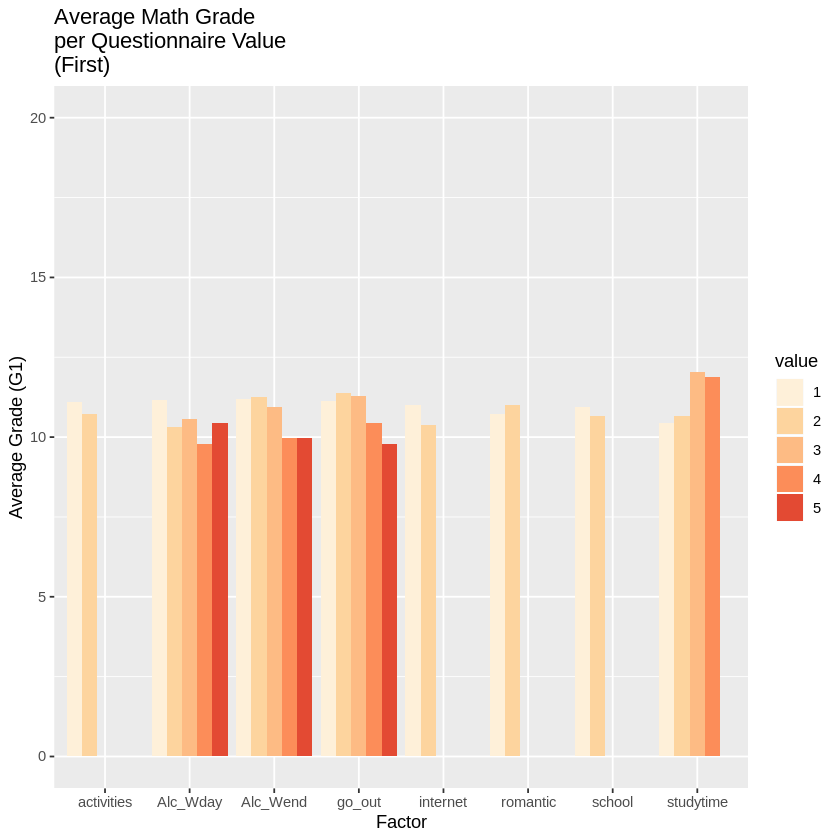

In [18]:
coul <- c('#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000')
plot1 <- ggplot(data = avg_grades_piv1) + 
        geom_bar(mapping = aes(x = Factor, y=AverageGrade, fill = value), position = "dodge", stat="identity") + 
        scale_fill_manual(values = coul) + ylab("Average Grade (G1)") + ylim(c(0,20)) + 
        ggtitle("Average Math Grade\nper Questionnaire Value\n(First) ") 
plot1

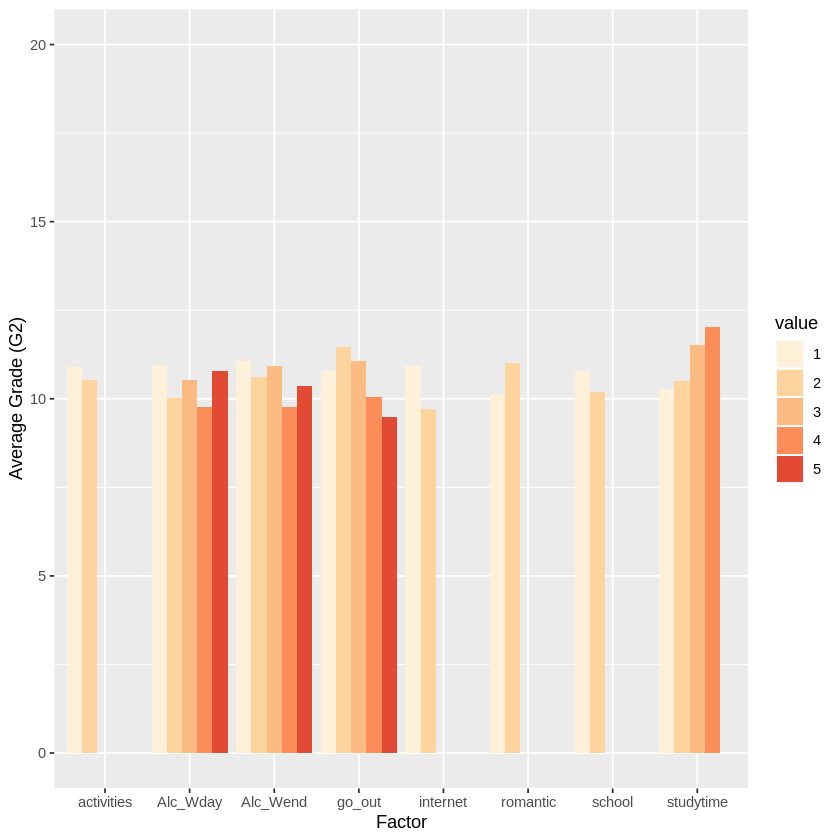

In [19]:
plot2 <- ggplot(data = avg_grades_piv2) + 
        geom_bar(mapping = aes(x = Factor, y=AverageGrade, fill = value), position = "dodge", stat="identity") + 
        ylab("Average Grade (G2)") + ylim(c(0,20)) + scale_fill_manual(values = coul)
plot2

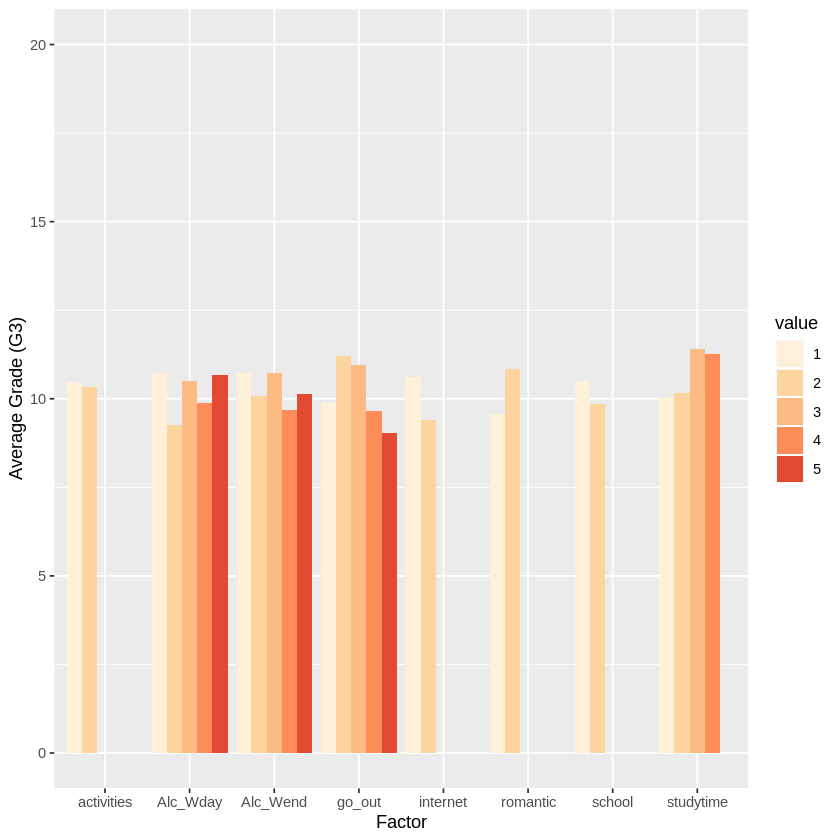

In [20]:
plot3 <- ggplot(data = avg_grades_piv3) + 
        geom_bar(mapping = aes(x = Factor, y=AverageGrade, fill = value), position = "dodge", stat="identity") + 
        ylab("Average Grade (G3)") + ylim(c(0,20)) + scale_fill_manual(values = coul)
plot3

In [21]:
file2 <- read.csv('/home/jpsvf2/jupyter/student-por.csv', encoding = 'utf-8', sep = ';', stringsAsFactors = FALSE)
head(file2)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [22]:
distinct(file2, studytime)

studytime
<int>
2
3
1
4


In [23]:
Dalc1_df2 <- select(file2, Dalc, G1, G2, G3) %>% filter(Dalc == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc1_df2 <- Dalc1_df2 %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc1_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc1_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc1_df2, Average.G3 = mean(G3, na.rm = T)))

Dalc2_df2 <- select(file2, Dalc, G1, G2, G3) %>% filter(Dalc == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc2_df2 <- Dalc2_df2 %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc2_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc2_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc2_df2, Average.G3 = mean(G3, na.rm = T)))

Dalc3_df2 <- select(file2, Dalc, G1, G2, G3) %>% filter(Dalc == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc3_df2 <- Dalc3_df2 %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc3_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc3_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc3_df2, Average.G3 = mean(G3, na.rm = T)))

Dalc4_df2 <- select(file2, Dalc, G1, G2, G3) %>% filter(Dalc == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc4_df2 <- Dalc4_df2 %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc4_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc4_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc4_df2, Average.G3 = mean(G3, na.rm = T)))

Dalc5_df2 <- select(file2, Dalc, G1, G2, G3) %>% filter(Dalc == 5) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Dalc5_df2 <- Dalc5_df2 %>% group_by(Dalc) %>% 
    transform(Avgerage.G1 = summarise(Dalc5_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Dalc5_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Dalc5_df2, Average.G3 = mean(G3, na.rm = T)))

head(Dalc1_df2, 1)
head(Dalc2_df2, 1)
head(Dalc3_df2, 1)
head(Dalc4_df2, 1)
head(Dalc5_df2, 1)

Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,11,11,11.69845,11.89579,12.29933


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,12,13,12,11.09091,11.15702,11.36364


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,10,11,11,10.44186,10.74419,11.13953


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,13,12,13,9.941176,9.470588,8.941176


Dalc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,12,11,12,9.529412,10.05882,10.23529


In [24]:
Walc1_df2 <- select(file2, Walc, G1, G2, G3) %>% filter(Walc == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc1_df2 <- Walc1_df2 %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc1_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc1_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc1_df2, Average.G3 = mean(G3, na.rm = T)))

Walc2_df2 <- select(file2, Walc, G1, G2, G3) %>% filter(Walc == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc2_df2 <- Walc2_df2 %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc2_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc2_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc2_df2, Average.G3 = mean(G3, na.rm = T)))

Walc3_df2 <- select(file2, Walc, G1, G2, G3) %>% filter(Walc == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc3_df2 <- Walc3_df2 %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc3_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc3_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc3_df2, Average.G3 = mean(G3, na.rm = T)))

Walc4_df2 <- select(file2, Walc, G1, G2, G3) %>% filter(Walc == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc4_df2 <- Walc4_df2 %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc4_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc4_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc4_df2, Average.G3 = mean(G3, na.rm = T)))

Walc5_df2 <- select(file2, Walc, G1, G2, G3) %>% filter(Walc == 5) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
Walc5_df2 <- Walc5_df2 %>% group_by(Walc) %>% 
    transform(Avgerage.G1 = summarise(Walc5_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(Walc5_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(Walc5_df2, Average.G3 = mean(G3, na.rm = T)))

head(Walc1_df2, 1)
head(Walc2_df2, 1)
head(Walc3_df2, 1)
head(Walc4_df2, 1)
head(Walc5_df2, 1)

Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,11,11,11.68826,11.95142,12.36032


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,11,13,13,11.74667,11.82,12.26


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,12,13,12,11.30833,11.5,11.66667


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,8,8,7,10.65517,10.73563,11.03448


Walc,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,12,11,12,10.33333,10.44444,10.55556


In [25]:
goout1_df2 <- select(file2, goout, G1, G2, G3) %>% filter(goout == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout1_df2 <- goout1_df2 %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout1_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout1_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout1_df2, Average.G3 = mean(G3, na.rm = T)))

goout2_df2 <- select(file2, goout, G1, G2, G3) %>% filter(goout == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout2_df2 <- goout2_df2 %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout2_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout2_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout2_df2, Average.G3 = mean(G3, na.rm = T)))

goout3_df2 <- select(file2, goout, G1, G2, G3) %>% filter(goout == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout3_df2 <- goout3_df2 %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout3_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout3_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout3_df2, Average.G3 = mean(G3, na.rm = T)))

goout4_df2 <- select(file2, goout, G1, G2, G3) %>% filter(goout == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout4_df2 <- goout4_df2 %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout4_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout4_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout4_df2, Average.G3 = mean(G3, na.rm = T)))

goout5_df2 <- select(file2, goout, G1, G2, G3) %>% filter(goout == 5) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
goout5_df2 <- goout5_df2 %>% group_by(goout) %>% 
    transform(Avgerage.G1 = summarise(goout5_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(goout5_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(goout5_df2, Average.G3 = mean(G3, na.rm = T)))

head(goout1_df2, 1)
head(goout2_df2, 1)
head(goout3_df2, 1)
head(goout4_df2, 1)
head(goout5_df2, 1)

goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,12,13,10.41667,10.4375,10.72917


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,12,13,12,12.01379,12.32414,12.66897


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,9,11,11,11.63415,11.74634,12.15122


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0,11,11,11.25532,11.52482,11.97163


goout,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,8,8,7,10.76364,10.8,10.87273


In [26]:
studytime1_df2 <- select(file2, studytime, G1, G2, G3) %>% filter(studytime == 1) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime1_df2 <- studytime1_df2 %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime1_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime1_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime1_df2, Average.G3 = mean(G3, na.rm = T)))

studytime2_df2 <- select(file2, studytime, G1, G2, G3) %>% filter(studytime == 2) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime2_df2 <- studytime2_df2 %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime2_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime2_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime2_df2, Average.G3 = mean(G3, na.rm = T)))

studytime3_df2 <- select(file2, studytime, G1, G2, G3) %>% filter(studytime == 3) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime3_df2 <- studytime3_df2 %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime3_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime3_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime3_df2, Average.G3 = mean(G3, na.rm = T)))

studytime4_df2 <- select(file2, studytime, G1, G2, G3) %>% filter(studytime == 4) %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
studytime4_df2 <- studytime4_df2 %>% group_by(studytime) %>% 
    transform(Avgerage.G1 = summarise(studytime4_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(studytime4_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(studytime4_df2, Average.G3 = mean(G3, na.rm = T)))

head(studytime1_df2, 1)
head(studytime2_df2, 1)
head(studytime3_df2, 1)
head(studytime4_df2, 1)

studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,13,12,10.50472,10.70283,10.84434


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,11,11,11.5377,11.6623,12.0918


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,14,14,14,12.42268,12.79381,13.2268


studytime,G1,G2,G3,Average.G1,Average.G2,Average.G3
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,17,17,17,12.77143,12.62857,13.05714


In [27]:
romanticy_df2 <- select(file2, romantic, G1, G2, G3) %>% filter(romantic == 'yes') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
romanticy_df2 <- romanticy_df2 %>% group_by(romantic) %>% 
    transform(Avgerage.G1 = summarise(romanticy_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(romanticy_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(romanticy_df2, Average.G3 = mean(G3, na.rm = T)))

romanticn_df2 <- select(file2, romantic, G1, G2, G3) %>% filter(romantic == 'no') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
romanticn_df2 <- romanticn_df2 %>% group_by(romantic) %>% 
    transform(Avgerage.G1 = summarise(romanticn_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(romanticn_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(romanticn_df2, Average.G3 = mean(G3, na.rm = T)))

head(romanticy_df2, 1)
head(romanticn_df2, 1)

romantic,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,14,14,14,11.12971,11.19665,11.52301


romantic,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,0,11,11,11.5561,11.7878,12.12927


In [28]:
internety_df2 <- select(file2, internet, G1, G2, G3) %>% filter(internet == 'yes') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
internety_df2 <- internety_df2 %>% group_by(internet) %>% 
    transform(Avgerage.G1 = summarise(internety_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(internety_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(internety_df2, Average.G3 = mean(G3, na.rm = T)))

internetn_df2 <- select(file2, internet, G1, G2, G3) %>% filter(internet == 'no') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
internetn_df2 <- internetn_df2 %>% group_by(internet) %>% 
    transform(Avgerage.G1 = summarise(internetn_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(internetn_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(internetn_df2, Average.G3 = mean(G3, na.rm = T)))

head(internety_df2, 1)
head(internetn_df2, 1)

internet,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,9,11,11,11.61044,11.80723,12.17269


internet,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,0,11,11,10.70199,10.78808,11.02649


In [29]:
activitiesy_df2 <- select(file2, activities, G1, G2, G3) %>% filter(activities == 'yes') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
activitiesy_df2 <- activitiesy_df2 %>% group_by(activities) %>% 
    transform(Avgerage.G1 = summarise(activitiesy_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(activitiesy_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(activitiesy_df2, Average.G3 = mean(G3, na.rm = T)))

activitiesn_df2 <- select(file2, activities, G1, G2, G3) %>% filter(activities == 'no') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
activitiesn_df2 <- activitiesn_df2 %>% group_by(activities) %>% 
    transform(Avgerage.G1 = summarise(activitiesn_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(activitiesn_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(activitiesn_df2, Average.G3 = mean(G3, na.rm = T)))

head(activitiesy_df2, 1)
head(activitiesn_df2, 1)

activities,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
yes,14,14,14,11.6254,11.77143,12.10476


activities,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,0,11,11,11.18563,11.38024,11.71856


In [30]:
schoolGP_df2 <- select(file2, school, G1, G2, G3) %>% filter(school == 'GP') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
schoolGP_df2 <- schoolGP_df2 %>% group_by(school) %>% 
    transform(Avgerage.G1 = summarise(schoolGP_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(schoolGP_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(schoolGP_df2, Average.G3 = mean(G3, na.rm = T)))

schoolMS_df2 <- select(file2, school, G1, G2, G3) %>% filter(school == 'MS') %>% transform(G1 = as.numeric(G1)) %>%
    transform(G2 = as.numeric(G2)) %>% transform(G3 = as.numeric(G3))
schoolMS_df2 <- schoolMS_df2 %>% group_by(school) %>% 
    transform(Avgerage.G1 = summarise(schoolMS_df2, Average.G1 = mean(G1, na.rm = T))) %>%
    transform(Avgerage.G2 = summarise(schoolMS_df2, Average.G2 = mean(G2, na.rm = T))) %>%
    transform(Avgerage.G3 = summarise(schoolMS_df2, Average.G3 = mean(G3, na.rm = T)))

head(schoolGP_df2, 1)
head(schoolMS_df2, 1)

school,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,0,11,11,11.98582,12.14421,12.57683


school,G1,G2,G3,Average.G1,Average.G2,Average.G3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MS,10,11,11,10.30088,10.49558,10.65044


In [31]:
Alc_Wend2 = c(11.68826, 11.95142, 12.36032, 11.74667, 11.82, 12.26, 11.30833, 11.5, 11.66667, 10.65517, 10.73563, 11.03448, 10.33333, 10.44444, 10.55556)
Alc_Wday2 = c(11.69845, 11.89579, 12.29933, 11.09091, 11.15702, 11.36364, 10.44186, 10.74419, 11.13953, 9.941176, 9.470588, 8.941176, 9.529412, 10.05882, 10.23529)
goout2 = c(10.41667, 10.4375, 10.72917, 12.01379, 12.32414, 12.66897, 11.63415, 11.74634, 12.15122, 11.25532, 11.52482, 11.97163, 10.76364, 10.8, 10.87273)
romantic2 = c(11.12971, 11.19665, 11.52301, 11.5561, 11.7878, 12.12927,  0, 0, 0,  0, 0, 0,  0, 0, 0)
internet2 = c(11.61044, 11.80723, 12.17269, 10.70199, 10.78808, 11.02649,  0, 0, 0,  0, 0, 0,  0, 0, 0)
studytime2 = c(10.50472, 10.70283, 10.84434, 11.5377, 11.6623, 12.0918, 12.42268, 12.79381, 13.2268, 12.77143, 12.62857, 13.05714, 0, 0, 0)
activities2 = c(11.6254, 11.77143, 12.10476, 11.18563, 11.38024, 11.71856,  0, 0, 0,  0, 0, 0,  0, 0, 0)
school2 = c(11.98582, 12.14421, 12.57683, 10.30088, 10.49558, 10.65044,  0, 0, 0,  0, 0, 0,  0, 0, 0)
value2 = c(1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5)
grade2 = c('G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G2', 'G3', 'G1', 'G2', 'G3')


avg_grades2 <- data.frame(Alc_Wend=Alc_Wend2, Alc_Wday=Alc_Wday2, go_out=goout2, romantic=romantic2, internet=internet2, studytime=studytime2, activities=activities2, school=school2, value=value2, grade=grade2)
avg_grades2

Alc_Wend,Alc_Wday,go_out,romantic,internet,studytime,activities,school,value,grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.68826,11.698450,10.41667,11.12971,11.61044,10.50472,11.62540,11.98582,1,G1
11.95142,11.895790,10.43750,11.19665,11.80723,10.70283,11.77143,12.14421,1,G2
12.36032,12.299330,10.72917,11.52301,12.17269,10.84434,12.10476,12.57683,1,G3
11.74667,11.090910,12.01379,11.55610,10.70199,11.53770,11.18563,10.30088,2,G1
11.82000,11.157020,12.32414,11.78780,10.78808,11.66230,11.38024,10.49558,2,G2
12.26000,11.363640,12.66897,12.12927,11.02649,12.09180,11.71856,10.65044,2,G3
11.30833,10.441860,11.63415,0.00000,0.00000,12.42268,0.00000,0.00000,3,G1
11.50000,10.744190,11.74634,0.00000,0.00000,12.79381,0.00000,0.00000,3,G2
11.66667,11.139530,12.15122,0.00000,0.00000,13.22680,0.00000,0.00000,3,G3


In [32]:
avg_grades2_piv <- avg_grades2 %>% pivot_longer(1:8, names_to = "Factor", values_to = "AverageGrade")
avg_grades2_piv

value,grade,Factor,AverageGrade
<dbl>,<fct>,<chr>,<dbl>
1,G1,Alc_Wend,11.68826
1,G1,Alc_Wday,11.69845
1,G1,go_out,10.41667
1,G1,romantic,11.12971
1,G1,internet,11.61044
1,G1,studytime,10.50472
1,G1,activities,11.62540
1,G1,school,11.98582
1,G2,Alc_Wend,11.95142


In [33]:
avg_grades2_piv <- avg_grades2_piv %>% transform(value = as.factor(value))

avg_grades2_piv1 <- avg_grades2_piv %>% filter(grade == 'G1')
avg_grades2_piv2 <- avg_grades2_piv %>% filter(grade == 'G2')
avg_grades2_piv3 <- avg_grades2_piv %>% filter(grade == 'G3')

avg_grades2_piv1

value,grade,Factor,AverageGrade
<fct>,<fct>,<chr>,<dbl>
1,G1,Alc_Wend,11.688260
1,G1,Alc_Wday,11.698450
1,G1,go_out,10.416670
1,G1,romantic,11.129710
1,G1,internet,11.610440
1,G1,studytime,10.504720
1,G1,activities,11.625400
1,G1,school,11.985820
2,G1,Alc_Wend,11.746670


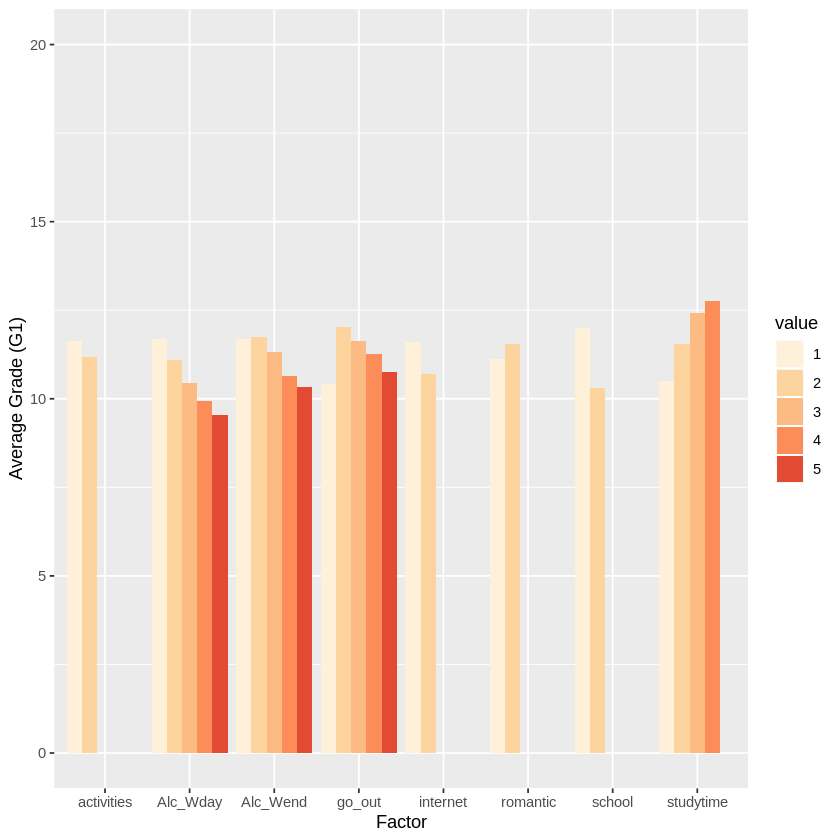

In [34]:
plot4 <- ggplot(data = avg_grades2_piv1) + 
        geom_bar(mapping = aes(x = Factor, y=AverageGrade, fill = value), position = "dodge", stat="identity") + 
        ylab("Average Grade (G1)") + ylim(c(0,20)) + scale_fill_manual(values = coul)
plot4

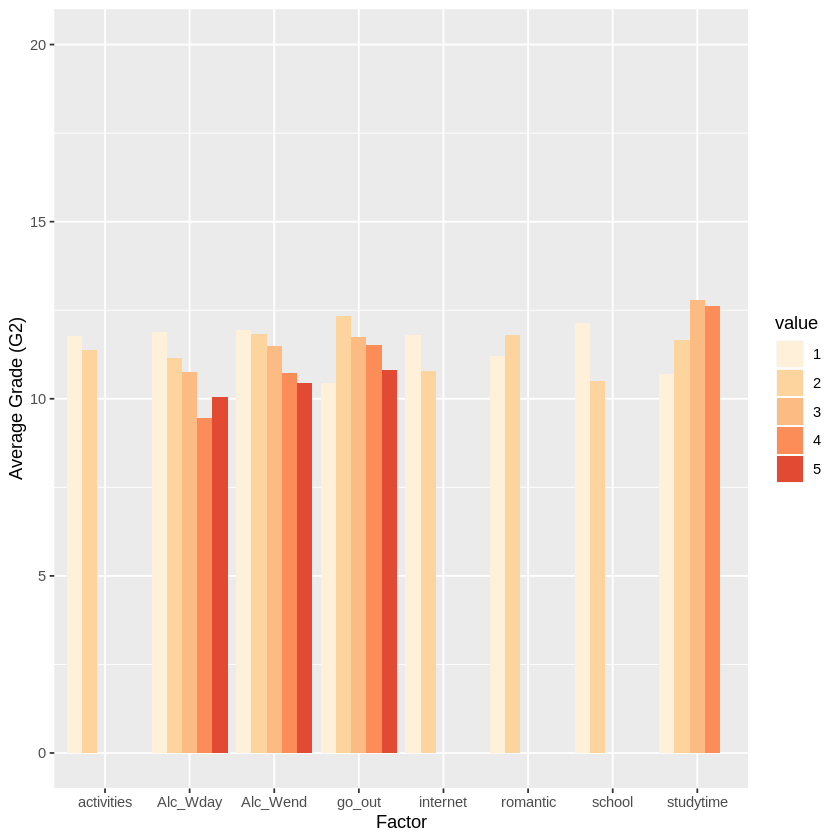

In [35]:
plot5 <- ggplot(data = avg_grades2_piv2) + 
        geom_bar(mapping = aes(x = Factor, y=AverageGrade, fill = value), position = "dodge", stat="identity") + 
        ylab("Average Grade (G2)") + ylim(c(0,20)) + scale_fill_manual(values = coul)
plot5

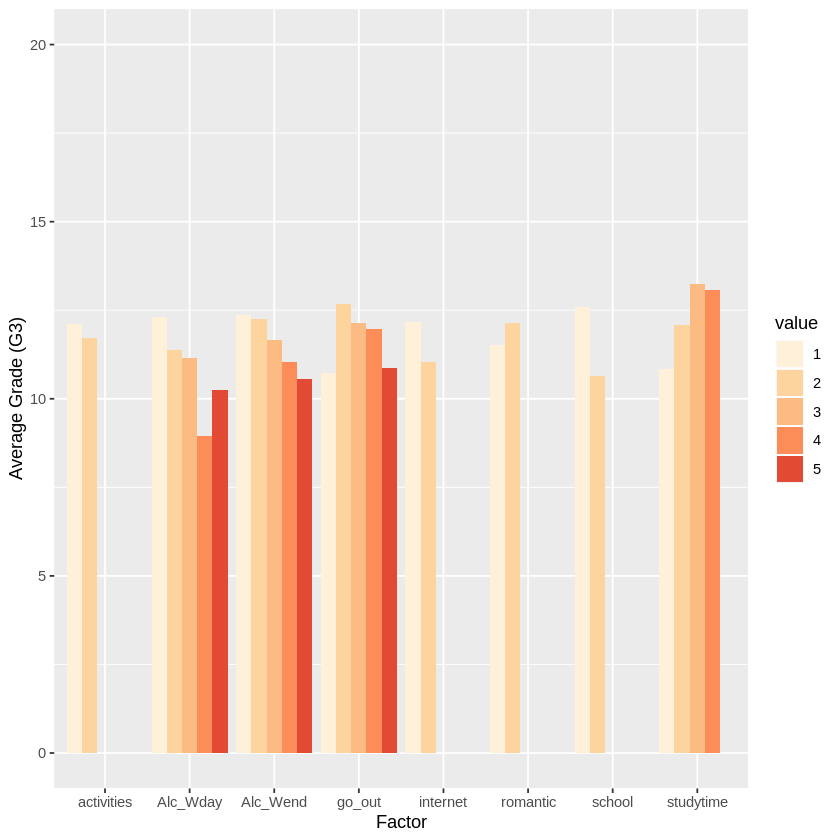

In [36]:
plot6 <- ggplot(data = avg_grades2_piv3) + 
        geom_bar(mapping = aes(x = Factor, y=AverageGrade, fill = value), position = "dodge", stat="identity") + 
        ylab("Average Grade (G3)") + ylim(c(0,20)) + scale_fill_manual(values = coul)
plot6

In [37]:
Amath <- file %>% filter(G3 >= 16)
Aport <- file2 %>% filter(G3 >= 16)
Pmath <- file %>% filter(G3 == max(G3))
Pport <- file2 %>% filter(G3 == max(G3))

Amath
Aport
Pmath
Pport

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,A,2,2,other,other,⋯,4,5,2,1,1,3,0,14,16,16
GP,M,16,U,LE3,T,4,2,teacher,other,⋯,4,5,1,1,3,5,2,15,15,16
GP,M,15,U,GT3,T,4,4,services,services,⋯,4,3,1,1,1,5,0,17,16,17
GP,M,15,R,GT3,T,4,3,teacher,at_home,⋯,4,5,2,1,1,5,0,17,16,16
GP,M,15,U,LE3,T,4,3,teacher,services,⋯,5,4,3,1,1,4,2,15,16,18
GP,M,15,U,GT3,T,4,4,services,teacher,⋯,4,3,3,1,1,5,2,19,18,18
GP,M,16,U,GT3,T,4,3,health,services,⋯,4,2,2,1,1,2,4,19,19,20
GP,F,16,U,GT3,T,4,2,services,other,⋯,4,2,3,1,1,5,2,15,16,16


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,15,16,17
GP,F,16,U,GT3,T,4,4,health,other,⋯,4,4,4,1,2,2,6,17,17,17
GP,M,16,U,GT3,T,4,3,health,services,⋯,4,2,2,1,1,2,2,17,17,17
GP,F,15,U,LE3,T,4,2,health,other,⋯,4,3,3,1,1,5,0,16,14,16
GP,M,15,U,GT3,T,4,4,teacher,health,⋯,3,2,2,1,1,5,8,15,15,16
GP,F,16,U,GT3,T,4,2,services,other,⋯,4,2,3,1,1,5,2,16,15,16
GP,F,16,R,GT3,T,4,4,health,teacher,⋯,2,4,4,2,3,4,0,17,16,16
GP,F,16,U,GT3,T,1,1,services,services,⋯,5,5,5,5,5,5,0,10,10,16
GP,F,16,U,LE3,T,4,3,teacher,services,⋯,5,4,3,1,2,1,2,16,15,16


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,M,16,U,GT3,T,4,3,health,services,⋯,4,2,2,1,1,2,4,19,19,20


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,17,R,LE3,T,3,1,services,other,⋯,3,1,2,1,1,3,0,18,19,19
MS,M,18,U,GT3,T,4,4,teacher,teacher,⋯,3,2,4,1,4,2,4,17,18,19


In [38]:
colnames(Amath)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

In [39]:
Amath$school <- replace(Amath$school, Amath$school == "GP", "1")
Amath$school <- replace(Amath$school, Amath$school == "MS", "2")
Amath$activities <- replace(Amath$activities, Amath$activities == "yes", "1")
Amath$activities <- replace(Amath$activities, Amath$activities == "no", "2")
Amath$internet <- replace(Amath$internet, Amath$internet == "yes", "1")
Amath$internet <- replace(Amath$internet, Amath$internet == "no", "2")
Amath$romantic <- replace(Amath$romantic, Amath$romantic == "yes", "1")
Amath$romantic <- replace(Amath$romantic, Amath$romantic == "no", "2")

Amath <- Amath %>% transform(school = as.numeric(school)) %>% transform(activities = as.numeric(activities)) %>%
                   transform(internet = as.numeric(internet)) %>% transform(romantic = as.numeric(romantic)) %>%
                    transform(studytime = as.numeric(studytime)) %>% transform(goout = as.numeric(goout)) %>%
                    transform(Dalc = as.numeric(Dalc)) %>% transform(Walc = as.numeric(Walc))

columns = c('school', 'studytime', 'activities', 'internet', 'romantic', 'goout', 'Dalc', 'Walc')
columnsG = c('G1', 'G2', 'G3')
Amath_piv <- Amath %>% pivot_longer(columns, names_to = "Factor", values_to = "value")
Amath_piv <- Amath_piv %>% pivot_longer(columnsG, names_to = "Gperiod", values_to = "grade")

head(Amath_piv)

sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,nursery,higher,famrel,freetime,health,absences,Factor,value,Gperiod,grade
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G1,16
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G2,18
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G1,16
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G2,18
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G3,19


In [40]:
Aport$school <- replace(Aport$school, Aport$school == "GP", "1")
Aport$school <- replace(Aport$school, Aport$school == "MS", "2")
Aport$activities <- replace(Aport$activities, Aport$activities == "yes", "1")
Aport$activities <- replace(Aport$activities, Aport$activities == "no", "2")
Aport$internet <- replace(Aport$internet, Aport$internet == "yes", "1")
Aport$internet <- replace(Aport$internet, Aport$internet == "no", "2")
Aport$romantic <- replace(Aport$romantic, Aport$romantic == "yes", "1")
Aport$romantic <- replace(Aport$romantic, Aport$romantic == "no", "2")

Aport <- Aport %>% transform(school = as.numeric(school)) %>% transform(activities = as.numeric(activities)) %>%
                   transform(internet = as.numeric(internet)) %>% transform(romantic = as.numeric(romantic)) %>%
                    transform(studytime = as.numeric(studytime))

Aport_piv <- Aport %>% pivot_longer(columns, names_to = "Factor", values_to = "value")
Aport_piv <- Aport_piv %>% pivot_longer(columnsG, names_to = "Gperiod", values_to = "grade")

head(Aport_piv)

sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,nursery,higher,famrel,freetime,health,absences,Factor,value,Gperiod,grade
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G1,15
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G2,16
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G3,17
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G1,15
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G2,16
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G3,17


In [41]:
Amath_piv1 <- Amath_piv %>% filter(Gperiod == 'G1')
Amath_piv2 <- Amath_piv %>% filter(Gperiod == 'G2')
Amath_piv3 <- Amath_piv %>% filter(Gperiod == 'G3')

Amath_piv3

Aport_piv1 <- Aport_piv %>% filter(Gperiod == 'G1')
Aport_piv2 <- Aport_piv %>% filter(Gperiod == 'G2')
Aport_piv3 <- Aport_piv %>% filter(Gperiod == 'G3')

head(Aport_piv3)

sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,nursery,higher,famrel,freetime,health,absences,Factor,value,Gperiod,grade
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,activities,2,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,internet,1,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,romantic,2,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,goout,2,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,Dalc,1,G3,19
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,Walc,1,G3,19
M,15,U,GT3,A,2,2,other,other,home,⋯,yes,yes,4,5,3,0,school,1,G3,16


sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,nursery,higher,famrel,freetime,health,absences,Factor,value,Gperiod,grade
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<int>
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,school,1,G3,17
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,studytime,2,G3,17
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,activities,2,G3,17
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,internet,1,G3,17
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,romantic,2,G3,17
M,15,U,LE3,A,3,2,services,other,home,⋯,yes,yes,4,2,1,0,goout,2,G3,17


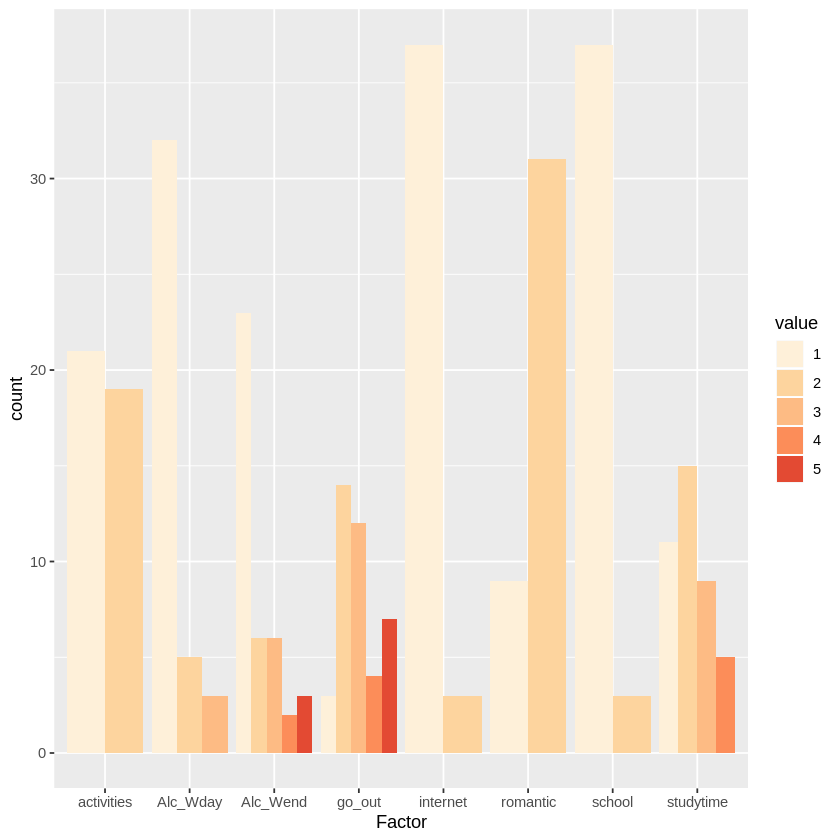

In [42]:
Amath_piv3 <- Amath_piv3 %>% transform(value = as.character(value))
Amath_piv3$Factor <- replace(Amath_piv3$Factor, Amath_piv3$Factor == "Dalc", "Alc_Wday")
Amath_piv3$Factor <- replace(Amath_piv3$Factor, Amath_piv3$Factor == "Walc", "Alc_Wend")
Amath_piv3$Factor <- replace(Amath_piv3$Factor, Amath_piv3$Factor == "goout", "go_out")

plot7 <- ggplot(data = Amath_piv3) + geom_bar(mapping = aes(x = Factor, fill = value), position = "dodge") + 
        scale_fill_manual(values = coul)
plot7

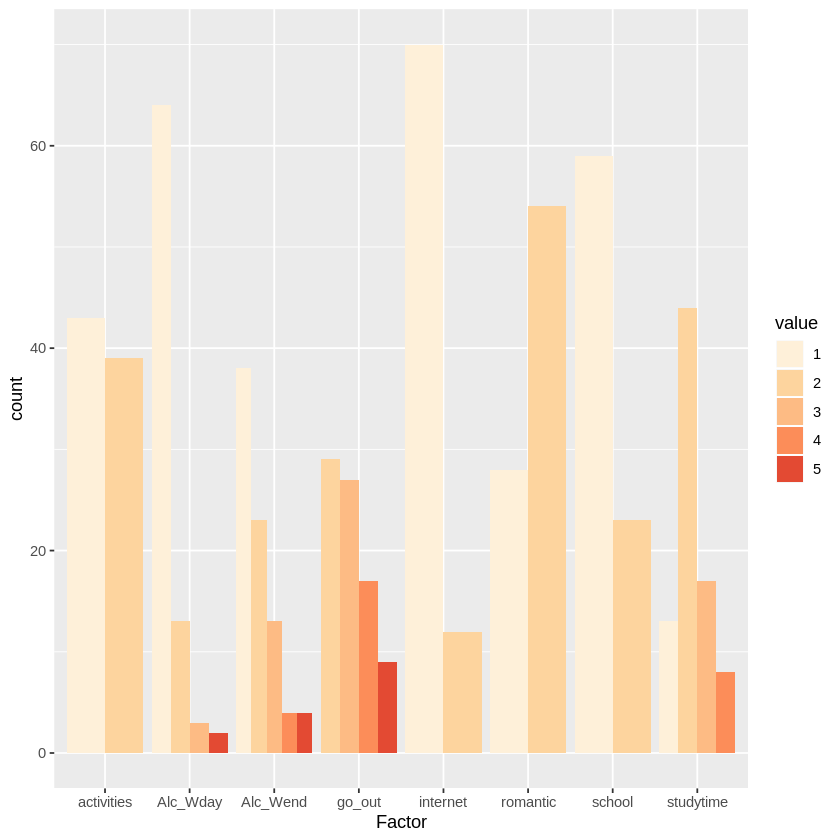

In [43]:
Aport_piv3 <- Aport_piv3 %>% transform(value = as.character(value))
Aport_piv3$Factor <- replace(Aport_piv3$Factor, Aport_piv3$Factor == "Dalc", "Alc_Wday")
Aport_piv3$Factor <- replace(Aport_piv3$Factor, Aport_piv3$Factor == "Walc", "Alc_Wend")
Aport_piv3$Factor <- replace(Aport_piv3$Factor, Aport_piv3$Factor == "goout", "go_out")

plot8 <- ggplot(data = Aport_piv3) + geom_bar(mapping = aes(x = Factor, fill = value), position = "dodge") +
        scale_fill_manual(values = coul)
plot8

In [44]:
print('Survey results from top Math student')
select(Pmath, school, sex, age, activities, Dalc, Walc, goout, internet, romantic, school, studytime, G1, G2, G3)

[1] "Survey results from top Math student"


school,sex,age,activities,Dalc,Walc,goout,internet,romantic,studytime,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
GP,M,16,yes,1,1,2,yes,no,4,19,19,20


In [45]:
print('Survey results from top Portuguese language student')
select(Pport, school, sex, age, activities, Dalc, Walc, goout, internet, romantic, school, studytime, G1, G2, G3)

[1] "Survey results from top Portuguese language student"


school,sex,age,activities,Dalc,Walc,goout,internet,romantic,studytime,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
GP,F,17,no,1,1,2,no,no,4,18,19,19
MS,M,18,yes,1,4,4,yes,no,2,17,18,19


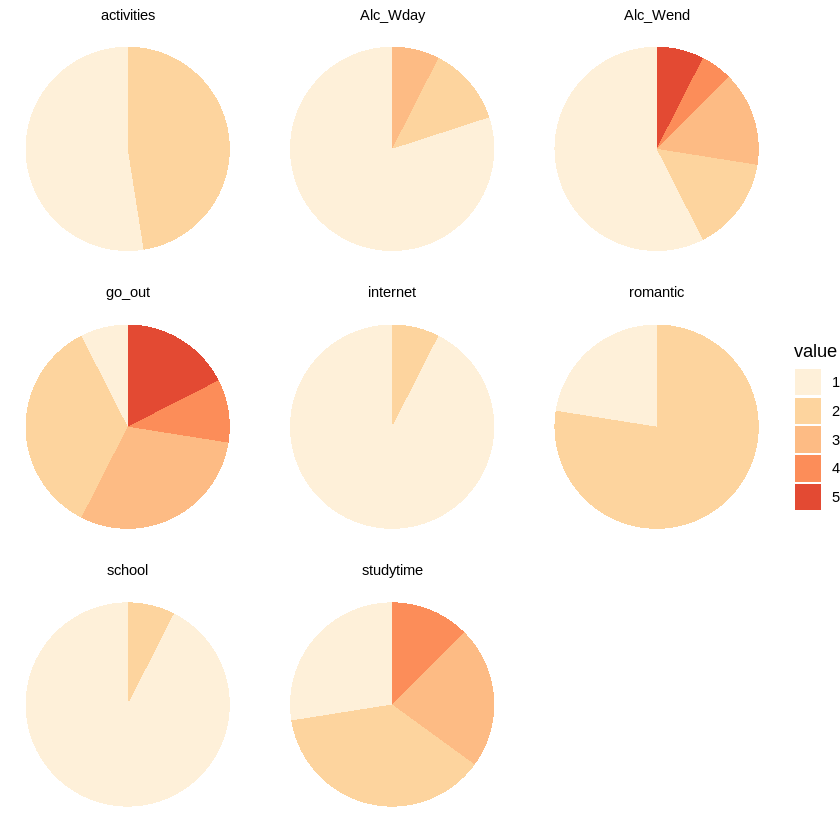

In [46]:
plot9 <- ggplot(Amath_piv3, aes(x = factor(1), fill=value)) +  
geom_bar(width=1, position="fill") +
coord_polar(theta="y") + theme_void() +
facet_wrap(~Factor) + scale_fill_manual(values = coul)

plot9

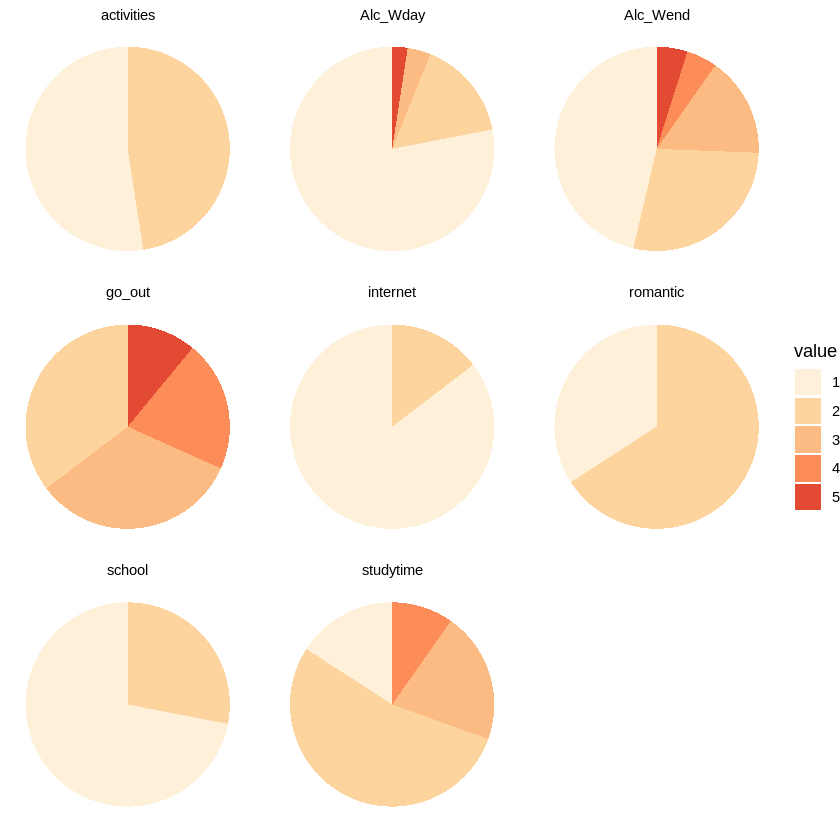

In [47]:
plot10 <- ggplot(Aport_piv3, aes(x = factor(1), fill=value)) +  
geom_bar(width=1, position="fill") +
coord_polar(theta="y") + theme_void() +
facet_wrap(~Factor) + scale_fill_manual(values = coul)

plot10

In [48]:
png(filename="plot1.png")

plot1

dev.off()

png 
  2

In [49]:
png(filename="plot2.png")

plot1

dev.off()

png 
  2

In [50]:
png(filename="plot1.png")

plot2

dev.off()

png 
  2

In [51]:
png(filename="plot3.png")

plot3

dev.off()

png 
  2

In [52]:
png(filename="plot4.png")

plot4

dev.off()

png 
  2

In [53]:
png(filename="plot5.png")

plot5

dev.off()

png 
  2

In [54]:
png(filename="plot6.png")

plot6

dev.off()

png 
  2

In [55]:
png(filename="plot7.png")

plot7

dev.off()

png 
  2

In [56]:
png(filename="plot8.png")

plot8

dev.off()

png 
  2

In [57]:
png(filename="plot9.png")

plot9

dev.off()

png 
  2

In [58]:
png(filename="plot10.png")

plot10

dev.off()

png 
  2

---

# Common Pitfalls / Inefficiencies

**Pay attention to the following in your visualizations and stories:**


### Color coordinate among plots so that the same data attributes have the same color in all plots

you can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value. 


### Perceptual grouping is important! group and/or order values

In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

Pie chart: order wedges. 

In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 


### No lengthy text in x axis

Flip the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

at least put them slanted in x axis for better readibility. 


### Plot only those that tell an obvious story

**No crowded** scatter plots with useless linear regression lines that don't tell anything. Look at alternative plots to tell your story.


### If you have too many classes (discrete variables/categories), try to group them 

Instead of giving a color to each of them, you can put them in meaningful groups and color code.

For sequential variables, you can do the same thing by binning. 

Stepped color palettes may be more useful than smooth sequential palettes (especially for comparison in choropleth maps).

You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 


### ANNOTATE!

**Tell** your audience what they are supposed to see. 

Use meaningful titles with a message, not dry titles. 

Use nice and concise axis labels. 

Use text annotations (look at the **examples in the lab notebook**).



### THEMING!

**Good looking** charts are more **convincing**. 

**Almost NEVER use the default color palette, default theme, default font.**


Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 



### Use space wisely!

**Balance the plots** to use space effectively.

Pay attention to data-ink ratio.

HAVE A FLOW left to right, top to bottom. 


